# Learn PyTorch Step-by-Step: A Beginner's Guide

# Chapter 0

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
%matplotlib inline
plt.style.use('fivethirtyeight')

# Visualizing Gradient Descent

## Model

$$
\Large y = b + w x + \epsilon
$$

## Data Generation

### Synthetic Data Generation

In [2]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
y = true_b + true_w * x + (.1 * np.random.randn(N, 1))

### Train-Validation-Test Split

In [3]:
# Shuffles the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generates train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

Text(0.5, 1.0, 'Generated Data - Validation')

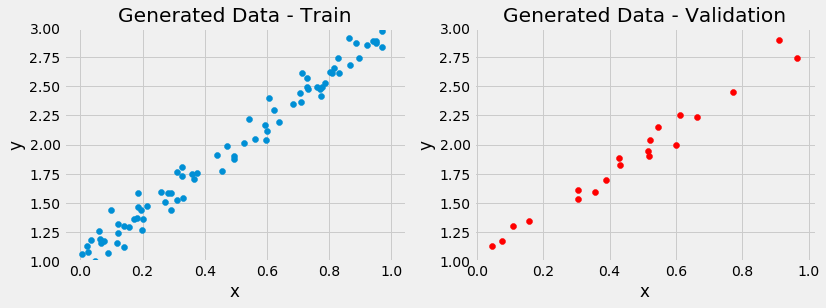

In [4]:
# Code for generating Figure 0.1
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].scatter(x_train, y_train)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_ylim([1, 3])
ax[0].set_title('Generated Data - Train')
ax[1].scatter(x_val, y_val, c='r')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_ylim([1, 3])
ax[1].set_title('Generated Data - Validation')

## Step 0: Random Initialization

In [5]:
# Step 0 - Initializes parameters "a" and "b" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


## Step 1: Compute Model's Predictions

In [6]:
# Step 1 - Computes our model's predicted output - forward pass
yhat = b + w * x_train

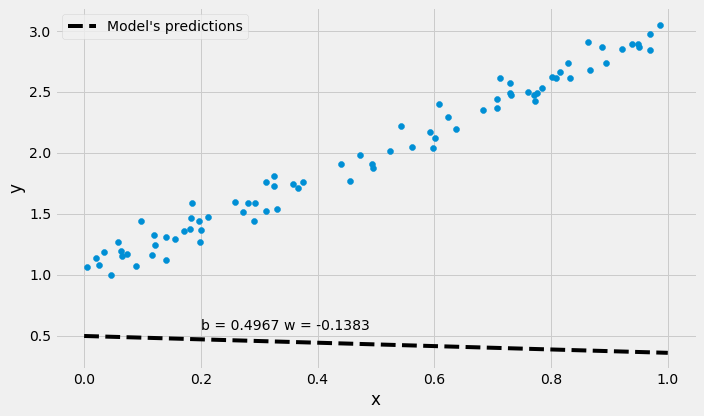

In [7]:
# Generates evenly spaced x feature
x_range = np.linspace(0, 1, 101)
# Computes yhat
yhat_range = b + w * x_range

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.set_xlabel('x')
ax.set_ylabel('y')

# Dataset
ax.scatter(x_train, y_train)
# Predictions
ax.plot(x_range, yhat_range, label='Model\'s predictions', c='k', linestyle='--')

# Annotations
ax.annotate('b = {:.4f} w = {:.4f}'.format(b[0], w[0]), xy=(.2, .55), c='k')
ax.legend(loc=0)
fig.tight_layout()

## Step 2: Compute the Loss

$$
\Large error_i = y_i - \hat{y_i}
$$

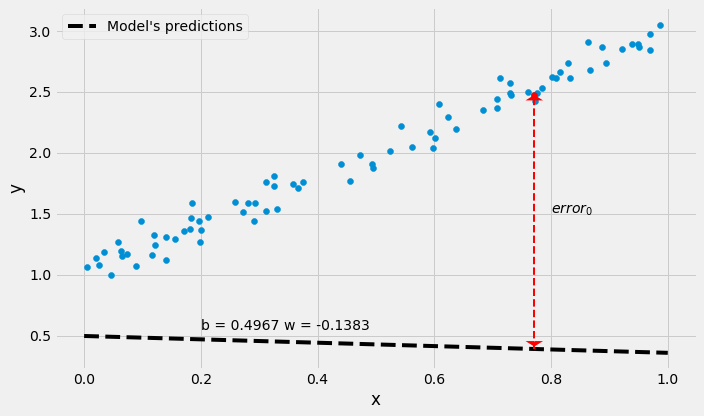

In [8]:
# First data point
x0, y0 = x_train[0][0], y_train[0][0]
# Generates evenly spaced x feature
x_range = np.linspace(0, 1, 101)
# Computes yhat
yhat_range = b + w * x_range

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.set_xlabel('x')
ax.set_ylabel('y')

# Dataset
ax.scatter(x_train, y_train)
# First data point
ax.scatter([x0], [y0], c='r')
# Predictions
ax.plot(x_range, yhat_range, label='Model\'s predictions', c='k', linestyle='--')
# Vertical line showing error between point and prediction
ax.plot([x0, x0], [b + w * x0, y0 - .03], c='r', linewidth=2, linestyle='--')
ax.arrow(x0, y0 - .03, 0, .03, color='r', shape='full', lw=0, length_includes_head=True, head_width=.03)
ax.arrow(x0, b + w * x0 + .05, 0, -.03, color='r', shape='full', lw=0, length_includes_head=True, head_width=.03)

# Annotations
ax.annotate(r'$error_0$', xy=(.8, 1.5))
ax.annotate('b = {:.4f} w = {:.4f}'.format(b[0], w[0]), xy=(.2, .55), c='k')
ax.legend(loc=0)
fig.tight_layout()

$$
\Large MSE = \frac{1}{n} \sum_{i=1}^n{error_i}^2
\\
\Large MSE = \frac{1}{n} \sum_{i=1}^n{(y_i - \hat{y_i})}^2
\\
\Large MSE = \frac{1}{n} \sum_{i=1}^n{(y_i - b - w x_i)}^2
$$

In [9]:
# Step 2 - Computing the loss
# We are using ALL data points, so this is BATCH gradient descent
# How wrong is our model? That's the error! 
error = (y_train - yhat)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()

print(loss)

2.7421577700550976


### Loss Surface

In [66]:
b_range = np.linspace(-2, 4, 101)
w_range = np.linspace(-1, 5, 101)
# meshgrid is a handy function that generates a grid of x and y values
# for all combinations
bs, ws = np.meshgrid(b_range, w_range)

In [11]:
all_predictions = np.apply_along_axis(func1d=lambda x: bs + ws * x, 
                                      axis=1, 
                                      arr=x_train)
all_errors = (all_predictions - y_train.reshape(-1, 1, 1))
all_losses = (all_errors ** 2).mean(axis=0)

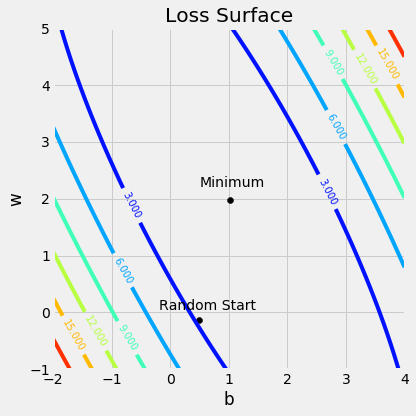

In [12]:
# Fits a linear regression to find the actual b and w that minimize the loss
regression = LinearRegression()
regression.fit(x_train, y_train)
b_minimum, w_minimum = regression.intercept_[0], regression.coef_[0][0]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.set_xlabel('b')
ax.set_ylabel('w')
ax.set_title('Loss Surface')

# Loss surface
CS = ax.contour(bs[0, :], ws[:, 0], all_losses, cmap=plt.cm.jet)
ax.clabel(CS, inline=1, fontsize=10)
# Minimum
ax.scatter(b_minimum, w_minimum, c='k')
# Random start
ax.scatter(b, w, c='k')
# Annotations
ax.annotate('Random Start', xy=(-.2, 0.05), c='k')
ax.annotate('Minimum', xy=(.5, 2.2), c='k')
fig.tight_layout()

### Cross Sections

In [13]:
b_idx = np.argmin(np.abs(bs[0, :] - b))
w_idx = np.argmin(np.abs(ws[:, 0] - w))

fixedb, fixedw = bs[0, b_idx], ws[w_idx, 0]

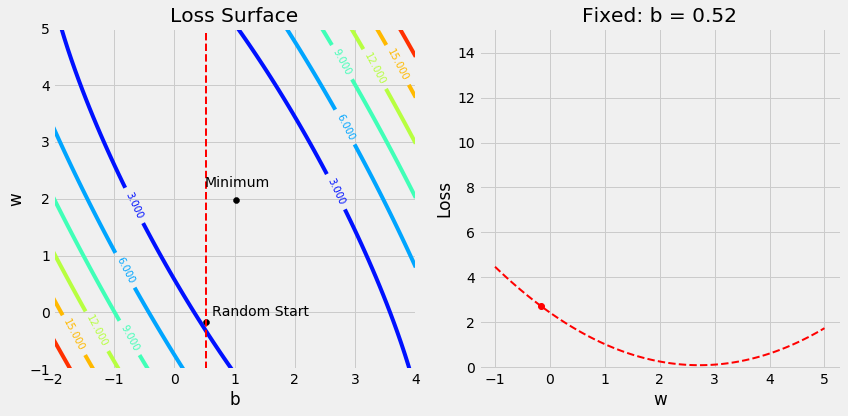

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].set_title('Loss Surface')
axs[0].set_xlabel('b')
axs[0].set_ylabel('w')
# Loss surface
CS = axs[0].contour(bs[0, :], ws[:, 0], all_losses, cmap=plt.cm.jet)
axs[0].clabel(CS, inline=1, fontsize=10)
# Minimum
axs[0].scatter(b_minimum, w_minimum, c='k')
# Starting point
axs[0].scatter(fixedb, fixedw, c='k')
# Vertical section
axs[0].plot([fixedb, fixedb], w_range[[0, -1]], linestyle='--', c='r', linewidth=2)
# Annotations
axs[0].annotate('Minimum', xy=(.5, 2.2), c='k')
axs[0].annotate('Random Start', xy=(fixedb + .1, fixedw + .1), c='k')

axs[1].set_ylim([-.1, 15.1])
axs[1].set_xlabel('w')
axs[1].set_ylabel('Loss')
axs[1].set_title('Fixed: b = {:.2f}'.format(fixedb))
# Loss
axs[1].plot(w_range, all_losses[:, b_idx], c='r', linestyle='--', linewidth=2)
# Starting point
axs[1].plot([fixedw], [all_losses[w_idx, b_idx]], 'or')

fig.tight_layout()

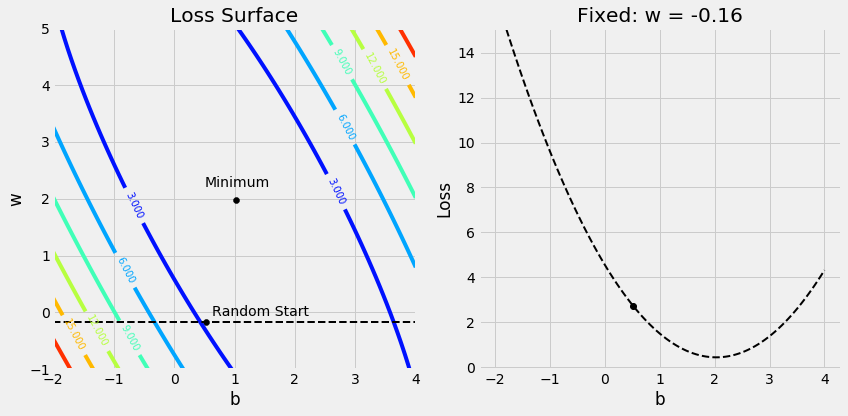

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].set_title('Loss Surface')
axs[0].set_xlabel('b')
axs[0].set_ylabel('w')
# Loss surface
CS = axs[0].contour(bs[0, :], ws[:, 0], all_losses, cmap=plt.cm.jet)
axs[0].clabel(CS, inline=1, fontsize=10)
# Minimum
axs[0].scatter(b_minimum, w_minimum, c='k')
# Starting point
axs[0].scatter(fixedb, fixedw, c='k')
# Horizontal section
axs[0].plot(b_range[[0, -1]], [fixedw, fixedw], linestyle='--', c='k', linewidth=2)
# Annotations
axs[0].annotate('Minimum', xy=(.5, 2.2), c='k')
axs[0].annotate('Random Start', xy=(fixedb + .1, fixedw + .1), c='k')

axs[1].set_ylim([-.1, 15.1])
axs[1].set_xlabel('b')
axs[1].set_ylabel('Loss')
axs[1].set_title('Fixed: w = {:.2f}'.format(fixedw))
# Loss
axs[1].plot(b_range, all_losses[w_idx, :], c='k', linestyle='--', linewidth=2)
# Starting point
axs[1].plot([fixedb], [all_losses[w_idx, b_idx]], 'ok')

fig.tight_layout()

## Step 3: Compute the Gradients

$$
\large \frac{\partial{MSE}}{\partial{b}} = \frac{\partial{MSE}}{\partial{\hat{y_i}}} \cdot \frac{\partial{\hat{y_i}}}{\partial{b}} = \frac{1}{N} \sum_{i=1}^N{2(y_i - b - w x_i) \cdot (-1)} = -2 \frac{1}{N} \sum_{i=1}^N{(y_i - \hat{y_i})}
\\
\large \frac{\partial{MSE}}{\partial{w}} = \frac{\partial{MSE}}{\partial{\hat{y_i}}} \cdot \frac{\partial{\hat{y_i}}}{\partial{w}} = \frac{1}{N} \sum_{i=1}^N{2(y_i - b - w x_i) \cdot (-x_i)} = -2 \frac{1}{N} \sum_{i=1}^N{x_i (y_i - \hat{y_i})}
$$

In [16]:
# Step 3 - Computes gradients for both "b" and "w" parameters
b_grad = -2 * error.mean()
w_grad = -2 * (x_train * error).mean()
print(b_grad, w_grad)

-3.044811379650508 -1.8337537171510832


### Visualizing the Gradients

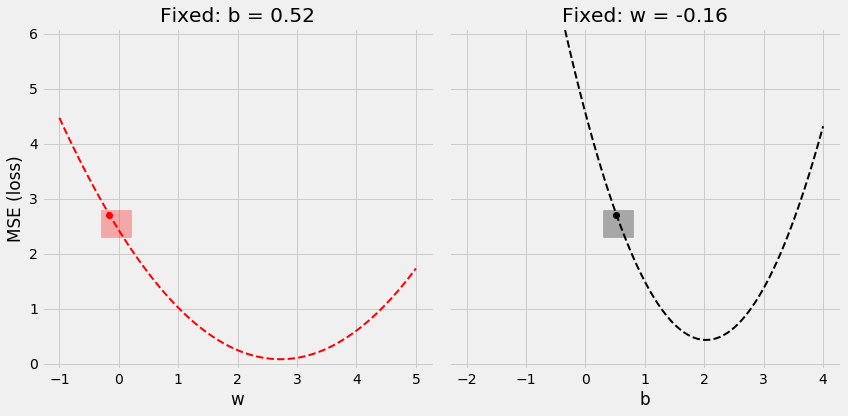

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_ylim([-.1, 6.1])
axs[0].set_xlabel('w')
axs[0].set_ylabel('MSE (loss)')
axs[0].set_title('Fixed: b = {:.2f}'.format(fixedb))
# Red rectangle
rect = Rectangle((-.3, 2.3),.5, .5)
pc = PatchCollection([rect], facecolor='r', alpha=.3, edgecolor='r')
axs[0].add_collection(pc)
# Loss - fixed b
axs[0].plot(w_range, all_losses[:, b_idx], c='r', linestyle='--', linewidth=2)
# Starting point
axs[0].plot([fixedw], [all_losses[w_idx, b_idx]], 'or')

axs[1].set_ylim([-.1, 6.1])
axs[1].set_xlabel('b')
axs[1].set_ylabel('MSE (loss)')
axs[1].set_title('Fixed: w = {:.2f}'.format(fixedw))
axs[1].label_outer()
# Black rectagnle
rect = Rectangle((.3, 2.3), .5, .5)
pc = PatchCollection([rect], facecolor='k', alpha=.3, edgecolor='k')
axs[1].add_collection(pc)
# Loss - fixed w
axs[1].plot(b_range, all_losses[w_idx, :], c='k', linestyle='--', linewidth=2)
# Starting point
axs[1].plot([fixedb], [all_losses[w_idx, b_idx]], 'ok')

fig.tight_layout()

In [24]:
ws_before = ws[w_idx, 0]
ws_after = ws[w_idx + 2, 0]
bs_before = bs[0, b_idx]
bs_after = bs[0, b_idx + 2]
loss_fixedb = all_losses[:, b_idx]
loss_fixedw = all_losses[w_idx, :]
loss_before = all_losses[w_idx, b_idx]
loss_after_b = all_losses[w_idx, b_idx + 2]
loss_after_w = all_losses[w_idx + 2, b_idx]

delta_b = bs_after - bs_before
delta_mse_b = loss_after_b - loss_before
manual_grad_b = delta_mse_b / delta_b

delta_mse_w = loss_after_w - loss_before
delta_w = ws_after - ws_before
manual_grad_w = delta_mse_w / delta_w

print(manual_grad_b, manual_grad_w)

-2.8987781364685463 -1.7874916123175564


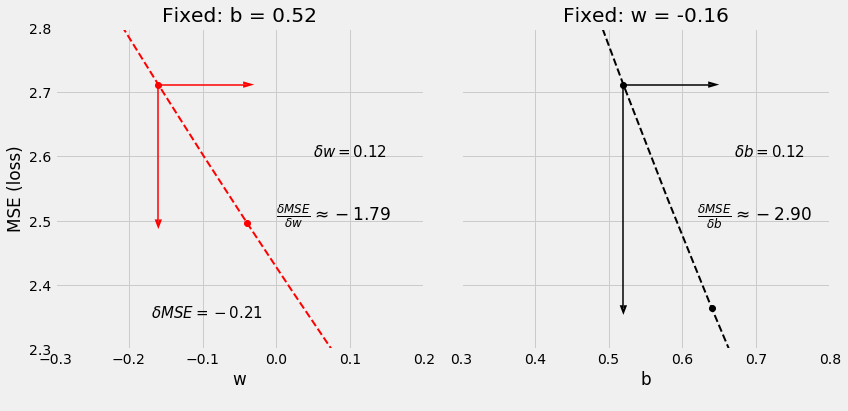

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].set_ylim([2.3, 2.8])
axs[0].set_xlim([-.3, .2])
axs[0].set_xlabel('w')
axs[0].set_ylabel('MSE (loss)')
axs[0].set_title('Fixed: b = {:.2f}'.format(fixedb))
axs[0].plot(w_range, loss_fixedb, c='r', linestyle='--', linewidth=2)
axs[0].plot([ws_before], [loss_before], 'or')
axs[0].plot([ws_after], [loss_after_w], 'or')

axs[0].arrow(ws_after, loss_before, .01, 0, color='r', shape='full', lw=0, length_includes_head=True, head_width=.01)
axs[0].arrow(ws_before, loss_after_w, 0, -0.01, color='r', shape='full', lw=0, length_includes_head=True, head_width=.01)
axs[0].plot([ws_before, ws_after], [loss_before, loss_before], 'r-', linewidth=1.5)
axs[0].plot([ws_before, ws_before], [loss_after_w, loss_before], 'r-', linewidth=1.5)

axs[0].annotate(r'$\delta w = {:.2f}$'.format(delta_w), xy=(.05, 2.6), c='k', fontsize=15)
axs[0].annotate(r'$\delta MSE = {:.2f}$'.format(delta_mse_w), xy=(-.17, 2.35), c='k', fontsize=15)
axs[0].annotate(r'$\frac{\delta MSE}{\delta w} \approx' + '{:.2f}$'.format(manual_grad_w), xy=(0, 2.5), c='k', fontsize=17)

axs[1].set_ylim([2.3, 2.8])
axs[1].set_xlim([.3, .8])
axs[1].set_xlabel('b')
axs[1].set_ylabel('MSE (loss)')
axs[1].set_title('Fixed: w = {:.2f}'.format(fixedw))
axs[1].plot(b_range, loss_fixedw, c='k', linestyle='--', linewidth=2)
axs[1].plot([bs_before], [loss_before], 'ok')
axs[1].plot([bs_after], [loss_after_b], 'ok')

axs[1].arrow(bs_after, loss_before, .01, 0, color='k', shape='full', lw=0, length_includes_head=True, head_width=.01)
axs[1].arrow(bs_before, loss_after_b, 0, -0.01, color='k', shape='full', lw=0, length_includes_head=True, head_width=.01)
axs[1].plot([bs_before, bs_after], [loss_before, loss_before], 'k-', linewidth=1.5)
axs[1].plot([bs_before, bs_before], [loss_after_b, loss_before], 'k-', linewidth=1.5)

axs[1].annotate(r'$\delta b = {:.2f}$'.format(delta_b), xy=(.67, 2.6), c='k', fontsize=15)
axs[1].annotate(r'$\delta MSE = {:.2f}$'.format(delta_mse_b), xy=(.45, 2.22), c='k', fontsize=15)
axs[1].annotate(r'$\frac{\delta MSE}{\delta b} \approx' + '{:.2f}$'.format(manual_grad_b), xy=(.62, 2.5), c='k', fontsize=17)

axs[1].label_outer()

fig.tight_layout()

### Backpropagation

## Step 4: Update the Parameters

$$
\Large b = b - \eta \frac{\partial{MSE}}{\partial{b}}
\\
\Large w = w - \eta \frac{\partial{MSE}}{\partial{w}}
$$

In [27]:
# Sets learning rate - this is "eta" ~ the "n" like Greek letter
lr = 0.1
print(b, w)

# Step 4 - Updates parameters using gradients and the learning rate
b = b - lr * b_grad
w = w - lr * w_grad

print(b, w)

[0.49671415] [-0.1382643]
[0.80119529] [0.04511107]


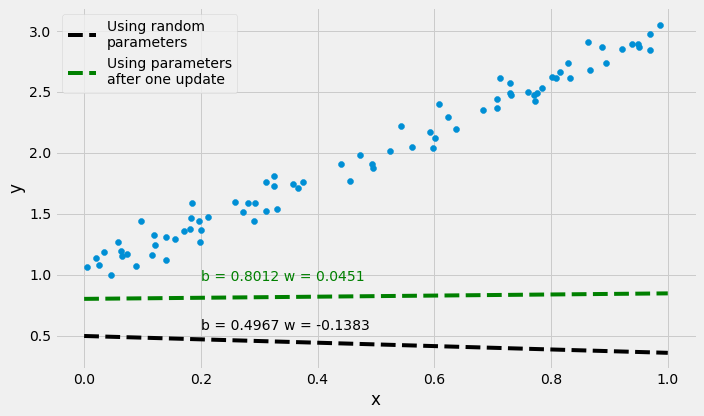

In [28]:
# Since we updated b and w, let's regenerate the initial ones
# That's how using a random seed is useful, for instance
np.random.seed(42)
b_initial = np.random.randn(1)
w_initial = np.random.randn(1)

# Generates evenly spaced x feature
x_range = np.linspace(0, 1, 101)

yhat_initial = b_initial + w_initial * x_range
yhat_range = b + w * x_range

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.scatter(x_train, y_train)
ax.plot(x_range, yhat_initial, label='Using random\nparameters', c='k', linestyle='--')
ax.plot(x_range, yhat_range, label='Using parameters\nafter one update', c='g', linestyle='--')

ax.annotate('b = {:.4f} w = {:.4f}'.format(b[0], w[0]), xy=(.2, .95), c='g')
ax.annotate('b = {:.4f} w = {:.4f}'.format(b_initial[0], w_initial[0]), xy=(.2, .55), c='k')

ax.legend(loc=0)
fig.tight_layout()

### Learning Rate

In [130]:
lr = .2

new_b_idx = np.argmin(np.abs(bs[0, :] - bs_before + lr * manual_grad_b))
new_w_idx = np.argmin(np.abs(ws[:, 0] - ws_before + lr * manual_grad_w))

loss_after_b = loss_fixedw[new_b_idx]
loss_after_w = loss_fixedb[new_w_idx]
ws_after = ws[new_w_idx, 0]
bs_after = bs[0, new_b_idx]

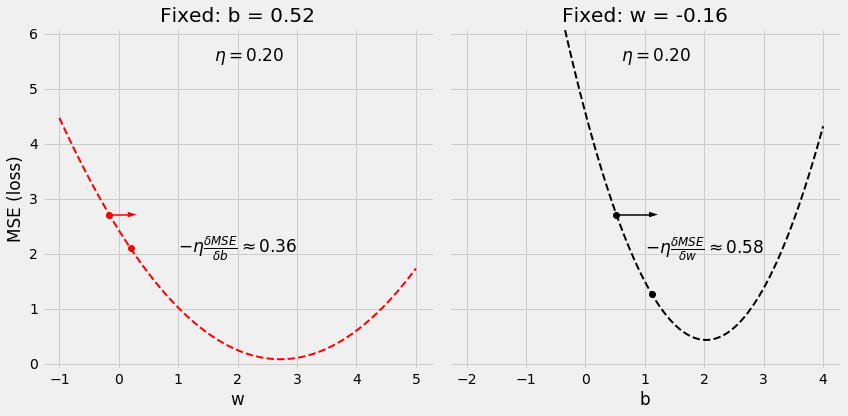

In [131]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].set_ylim([-.1, 6.1])
axs[0].set_xlabel('w')
axs[0].set_ylabel('MSE (loss)')
axs[0].set_title('Fixed: b = {:.2f}'.format(fixedb))

axs[0].plot(w_range, loss_fixedb, c='r', linestyle='--', linewidth=2)
axs[0].plot([fixedw], [loss_before], 'or')

axs[0].arrow(ws_after, loss_before, .1, 0, color='r', shape='full', lw=0, length_includes_head=True, head_width=.1)
axs[0].plot([ws_before, ws_after], [loss_before, loss_before], 'r-', linewidth=1.5)
axs[0].plot([ws_after], [loss_after_w], 'or')

axs[0].annotate(r'$\eta = {:.2f}$'.format(lr), xy=(1.6, 5.5), c='k', fontsize=17)
axs[0].annotate(r'$-\eta \frac{\delta MSE}{\delta b} \approx' + '{:.2f}$'.format(-lr * manual_grad_w), xy=(1, 2), c='k', fontsize=17)

axs[1].set_ylim([-.1, 6.1])
axs[1].set_xlabel('b')
axs[1].set_ylabel('MSE (loss)')
axs[1].set_title('Fixed: w = {:.2f}'.format(fixedw))
axs[1].label_outer()

axs[1].plot(b_range, loss_fixedw, c='k', linestyle='--', linewidth=2)
axs[1].plot([fixedb], [loss_before], 'ok')

axs[1].arrow(bs_after, loss_before, .1, 0, color='k', shape='full', lw=0, length_includes_head=True, head_width=.1)
axs[1].plot([bs_before, bs_after], [loss_before, loss_before], 'k-', linewidth=1.5)
axs[1].plot([bs_after], [loss_after_b], 'ok')

axs[1].annotate(r'$\eta = {:.2f}$'.format(lr), xy=(0.6, 5.5), c='k', fontsize=17)
axs[1].annotate(r'$-\eta \frac{\delta MSE}{\delta w} \approx' + '{:.2f}$'.format(-lr * manual_grad_b), xy=(1, 2), c='k', fontsize=17)

fig.tight_layout()

In [39]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)

# We divide w by 10
bad_w = true_w / 10
# And multiply x by 10
bad_x = np.random.rand(N, 1) * 10

# So, the net effect on y is zero - it is still the same as before
y = true_b + bad_w * bad_x + (.1 * np.random.randn(N, 1))

In [40]:
# Generates train and validation sets
# It uses the same train_idx and val_idx as before, but it applies to bad_x
bad_x_train, y_train = bad_x[train_idx], y[train_idx]
bad_x_val, y_val = bad_x[val_idx], y[val_idx]

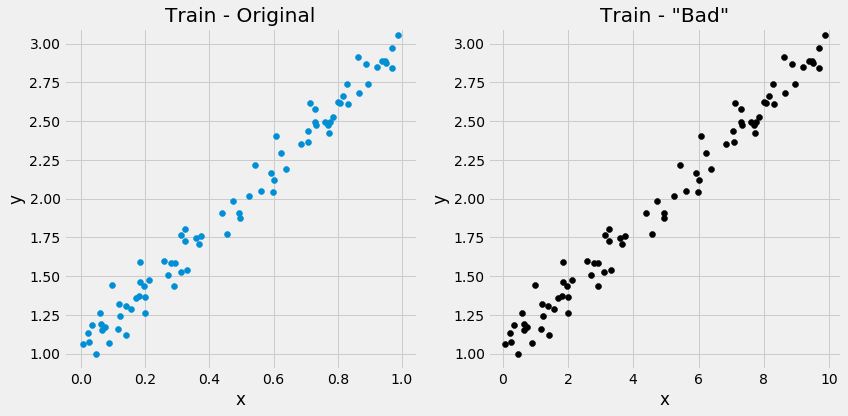

In [41]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].scatter(x_train, y_train)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_ylim([.9, 3.1])
ax[0].set_title('Train - Original')
ax[1].scatter(bad_x_train, y_train, c='k')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_ylim([.9, 3.1])
ax[1].set_title('Train - "Bad"')
fig.tight_layout()

In [42]:
bad_b_range = np.linspace(-2, 4, 101)
bad_w_range = np.linspace(-2.8, 3.2, 101)
bad_bs, bad_ws = np.meshgrid(bad_b_range, bad_w_range)

all_predictions = np.apply_along_axis(func1d=lambda x: bad_bs + bad_ws * x, axis=1, arr=x_train)
all_errors = (all_predictions - y_train.reshape(-1, 1, 1))
all_losses = (all_errors ** 2).mean(axis=0)

bad_all_predictions = np.apply_along_axis(func1d=lambda x: bad_bs + bad_ws * x, axis=1, arr=bad_x_train)
bad_all_errors = (bad_all_predictions - y_train.reshape(-1, 1, 1))
bad_all_losses = (bad_all_errors ** 2).mean(axis=0)

In [43]:
# Fits a linear regression to find the actual b and w that minimize the loss
regression = LinearRegression()
regression.fit(bad_x_train, y_train)
bad_b_minimum, bad_w_minimum = regression.intercept_[0], regression.coef_[0][0]

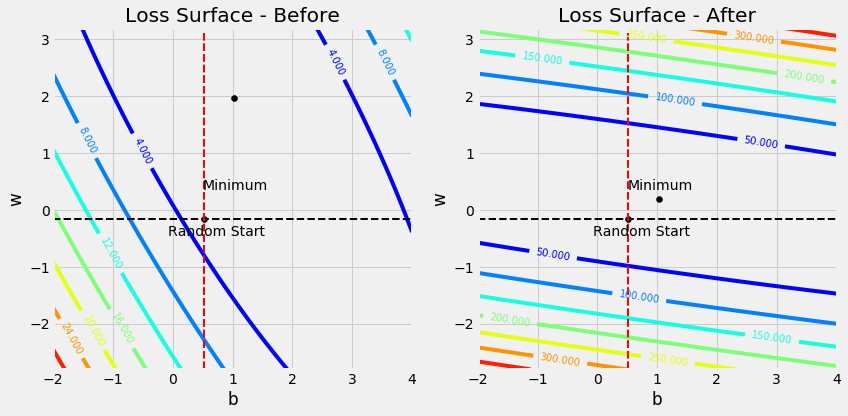

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

ax = axs[0]
CS = ax.contour(bad_bs[0, :], bad_ws[:, 0], all_losses, cmap=plt.cm.jet)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_xlabel('b')
ax.set_ylabel('w')
ax.scatter(b_minimum, w_minimum, c='k')
ax.annotate('Minimum', xy=(.5, .35), c='k')
ax.scatter(fixedb, fixedw, c='k')
ax.annotate('Random Start', xy=(fixedb - .6, fixedw - .3), c='k')
ax.set_title('Loss Surface - Before')
ax.plot([fixedb, fixedb], bad_w_range[[0, -1]], linestyle='--', c='r', linewidth=2)
ax.plot(b_range[[0, -1]], [fixedw, fixedw], linestyle='--', c='k', linewidth=2)
ax.plot([fixedb, fixedb], bad_w_range[[0, -1]], linestyle='--', c='r', linewidth=2)

ax = axs[1]
CS = ax.contour(bad_bs[0, :], bad_ws[:, 0], bad_all_losses, cmap=plt.cm.jet)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_xlabel('b')
ax.set_ylabel('w')
ax.scatter(bad_b_minimum, bad_w_minimum, c='k')
ax.annotate('Minimum', xy=(.5, .35), c='k')
ax.scatter(fixedb, fixedw, c='k')
ax.annotate('Random Start', xy=(fixedb - .6, fixedw - .3), c='k')
ax.set_title('Loss Surface - After')
ax.plot([fixedb, fixedb], bad_w_range[[0, -1]], linestyle='--', c='r', linewidth=2)
ax.plot(b_range[[0, -1]], [fixedw, fixedw], linestyle='--', c='k', linewidth=2)
ax.plot([fixedb, fixedb], bad_w_range[[0, -1]], linestyle='--', c='r', linewidth=2)

fig.tight_layout()

In [45]:
bad_b_idx = np.argmin(np.abs(bad_bs[0, :] - fixedb))
bad_w_idx = np.argmin(np.abs(bad_ws[:, 0] - fixedw))

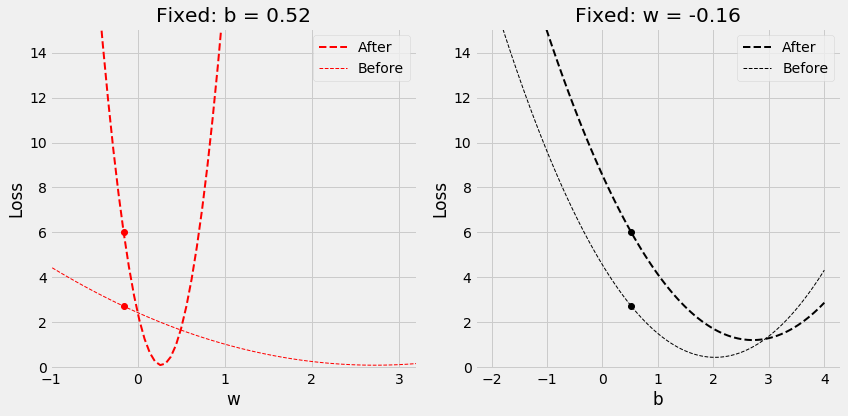

In [46]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

ax = axs[1]
ax.plot(bad_b_range, bad_all_losses[bad_w_idx, :], c='k', linestyle='--', linewidth=2, label='After')
ax.plot(bad_b_range, all_losses[bad_w_idx, :], c='k', linestyle='--', linewidth=1, label='Before')
ax.set_ylim([-.1, 15.1])
ax.set_xlabel('b')
ax.set_ylabel('Loss')
ax.set_title('Fixed: w = {:.2f}'.format(fixedw))
ax.plot([fixedb], [bad_all_losses[bad_w_idx, bad_b_idx]], 'ok')
ax.plot([fixedb], [all_losses[bad_w_idx, bad_b_idx]], 'ok')
ax.legend()

ax = axs[0]
ax.plot(bad_w_range, bad_all_losses[:, bad_b_idx], c='r', linestyle='--', linewidth=2, label='After')
ax.plot(bad_w_range, all_losses[:, bad_b_idx], c='r', linestyle='--', linewidth=1, label='Before')
ax.set_ylim([-.1, 15.1])
ax.set_xlim([-1, 3.2])
ax.set_xlabel('w')
ax.set_ylabel('Loss')
ax.set_title('Fixed: b = {:.2f}'.format(fixedb))
ax.plot([fixedw], [bad_all_losses[bad_w_idx, bad_b_idx]], 'or')
ax.plot([fixedw], [all_losses[bad_w_idx, bad_b_idx]], 'or')
ax.legend()

fig.tight_layout()

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
# We use the TRAIN set ONLY to fit the scaler
scaler.fit(bad_x_train)

# Now we can use the already fit scaler to
# TRANSFORM both TRAIN and VALIDATION sets
scaled_x_train = scaler.transform(bad_x_train)
scaled_x_val = scaler.transform(bad_x_val)

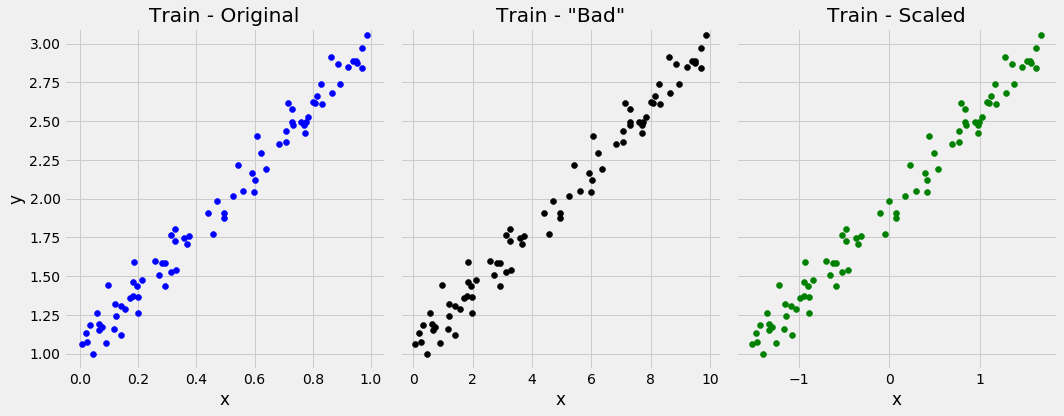

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
ax[0].scatter(x_train, y_train, c='b')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_ylim([.9, 3.1])
ax[0].set_title('Train - Original')
ax[1].scatter(bad_x_train, y_train, c='k')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')
ax[1].set_ylim([.9, 3.1])
ax[1].set_title('Train - "Bad"')
ax[1].label_outer()
ax[2].scatter(scaled_x_train, y_train, c='g')
ax[2].set_xlabel('x')
ax[2].set_ylabel('y')
ax[2].set_ylim([.9, 3.1])
ax[2].set_title('Train - Scaled')
ax[2].label_outer()

fig.tight_layout()

In [49]:
# Fits a linear regression to find the actual b and w that minimize the loss
regression = LinearRegression()
regression.fit(scaled_x_train, y_train)
scaled_b_minimum, scaled_w_minimum = regression.intercept_[0], regression.coef_[0][0]

In [50]:
scaled_b_range = np.linspace(-1, 5, 101)
scaled_w_range = np.linspace(-2.4, 3.6, 101)
scaled_bs, scaled_ws = np.meshgrid(scaled_b_range, scaled_w_range)

all_predictions = np.apply_along_axis(func1d=lambda x: scaled_bs + scaled_ws * x, axis=1, arr=x_train)
all_errors = (all_predictions - y_train.reshape(-1, 1, 1))
all_losses = (all_errors ** 2).mean(axis=0)

bad_all_predictions = np.apply_along_axis(func1d=lambda x: scaled_bs + scaled_ws * x, axis=1, arr=bad_x_train)
bad_all_errors = (bad_all_predictions - y_train.reshape(-1, 1, 1))
bad_all_losses = (bad_all_errors ** 2).mean(axis=0)

scaled_all_predictions = np.apply_along_axis(func1d=lambda x: scaled_bs + scaled_ws * x, axis=1, arr=scaled_x_train)
scaled_all_errors = (scaled_all_predictions - y_train.reshape(-1, 1, 1))
scaled_all_losses = (scaled_all_errors ** 2).mean(axis=0)

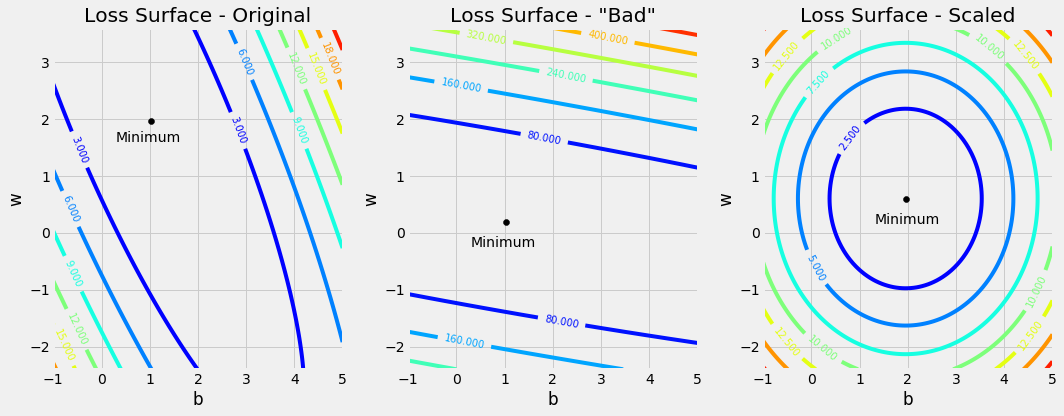

In [51]:
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

ax = axs[0]
CS = ax.contour(scaled_bs[0, :], scaled_ws[:, 0], all_losses, cmap=plt.cm.jet)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_xlabel('b')
ax.set_ylabel('w')
ax.scatter(b_minimum, w_minimum, c='k')
ax.annotate('Minimum', xy=(.3, 1.6), c='k')
ax.set_title('Loss Surface - Original')

ax = axs[1]
CS = ax.contour(scaled_bs[0, :], scaled_ws[:, 0], bad_all_losses, cmap=plt.cm.jet)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_xlabel('b')
ax.set_ylabel('w')
ax.scatter(bad_b_minimum, bad_w_minimum, c='k')
ax.annotate('Minimum', xy=(.3, -.25), c='k')
ax.set_title('Loss Surface - "Bad"')

ax = axs[2]
CS = ax.contour(scaled_bs[0, :], scaled_ws[:, 0], scaled_all_losses, cmap=plt.cm.jet)
ax.clabel(CS, inline=1, fontsize=10)
ax.set_xlabel('b')
ax.set_ylabel('w')
ax.scatter(scaled_b_minimum, scaled_w_minimum, c='k')
ax.annotate('Minimum', xy=(1.3, .15), c='k')
ax.set_title('Loss Surface - Scaled')


fig.tight_layout()

## Step 5: Rinse and Repeat!

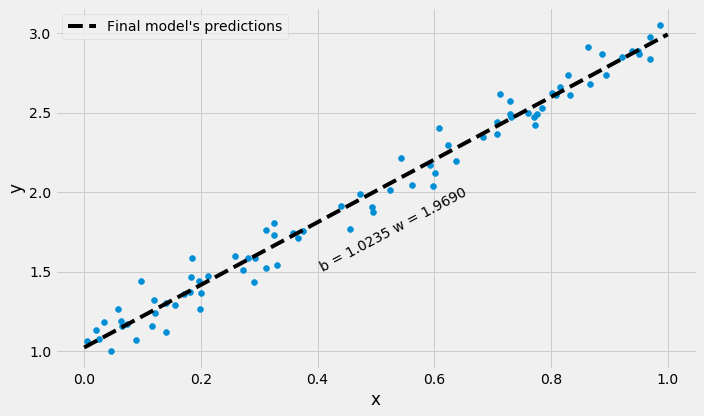

In [52]:
x_range = np.linspace(0, 1, 101)
yhat_range = b_minimum + w_minimum * x_range

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.scatter(x_train, y_train)
ax.plot(x_range, yhat_range, label='Final model\'s predictions', c='k', linestyle='--')

ax.annotate('b = {:.4f} w = {:.4f}'.format(b_minimum, w_minimum), xy=(.4, 1.5), c='k', rotation=28)

ax.legend(loc=0)
fig.tight_layout()